# Mini Project 1 

## Research Question:
Which factors (such as study habits, parental involvement, and internet usage) most strongly influence student academic performance, and how do these factors relate to each other?

## Dataset Documentation:

**Source**: https://www.kaggle.com/datasets/anassarfraz13/student-success-factors-and-insights?resource=download 

**Provider** Kaggle

**Description**: Includes information of about 6,590 students and the factors that may affect their academic performance, including study habits, attendance, parental involvement, access to resources, extracurricular activities, sleep hours, motivation, and socio-economic background

**Reason For Choice**: As a college student who is frequently studying for exams, this data can be very useful to see what strategies are effective in boosting performance. It could also show if there are any suprising factors that effect performance in ways that are not as expected.

### Import Data

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd 

df = pd.read_csv("s3://ia-340-fall-2025-1078447/StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


### Clean Data 
To prepare the dataset for analysis, I first generated a basic profile using .info() and .describe(), which provided an overview of the variables, their data types, and summary statistics. Next, I checked for missing values across all columns. Any rows containing null values were removed to ensure the integrity of the analysis, since imputing them might have introduced bias in student performance outcomes. I then examined the dataset for duplicate rows, preventing redundancy from skewing results. After these steps, the dataset was cleaned and ready for further processing.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [3]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [4]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [6]:
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows before removal: {duplicates}")


Number of duplicate rows before removal: 0


Because there are no duplicates, There is nothing further for me to do in order to clean the data further

### Process the Data

In this section, I created a new variable called "Study Efficiency". This variable is simply the exam score divided by the hours studied, creating a ratio of exam performance to study time. A higher score indicates that the student performs better per hour studied, demonstrating higher efficiency. I can use this variable to see if there are any other factors that help create a higher study efficiency.

In [7]:
df['Study_Efficiency'] = df['Exam_Score'] / df['Hours_Studied']


df['Study_Efficiency'] = df['Study_Efficiency'].replace([float('inf'), -float('inf')], None)
df = df.dropna(subset=['Study_Efficiency'])

print(df[['Exam_Score', 'Hours_Studied', 'Study_Efficiency']].head())


   Exam_Score  Hours_Studied  Study_Efficiency
0          67             23          2.913043
1          61             19          3.210526
2          74             24          3.083333
3          71             29          2.448276
4          70             19          3.684211


### Query the Data 

Grouping the people that scored the very highest on the exam can give insights into what the best of the best students are doing in order to get the grades that they do. 

In [8]:
high_performers = df[df['Exam_Score'] > 90]

print("High-Performing Students (Exam_Score > 85):")
print(high_performers.head())

count_high = high_performers.shape[0]
print(f"\nNumber of high-performing students: {count_high}")

print("\nAverage metrics for high-performing students:")
print(high_performers[['Hours_Studied', 'Study_Efficiency']].mean())


High-Performing Students (Exam_Score > 85):
     Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
94              18          89                 High              Medium   
529             15          83               Medium              Medium   
770             24          96                  Low                High   
836             29          76               Medium              Medium   
919             21          74                 High              Medium   

    Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
94                         Yes            4               73           Medium   
529                         No            7               97           Medium   
770                         No            6               93           Medium   
836                         No            8               96              Low   
919                         No            6               94           Medium   

    Internet_Acces

### Visualize the Data

The following code was generated Using Chat-GPT 5 chatbot

Matplotlib is building the font cache; this may take a moment.


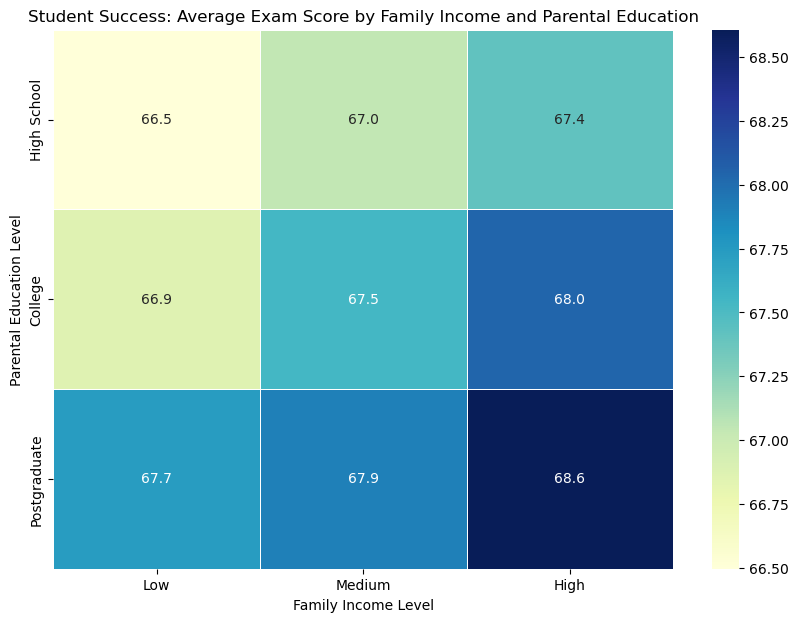

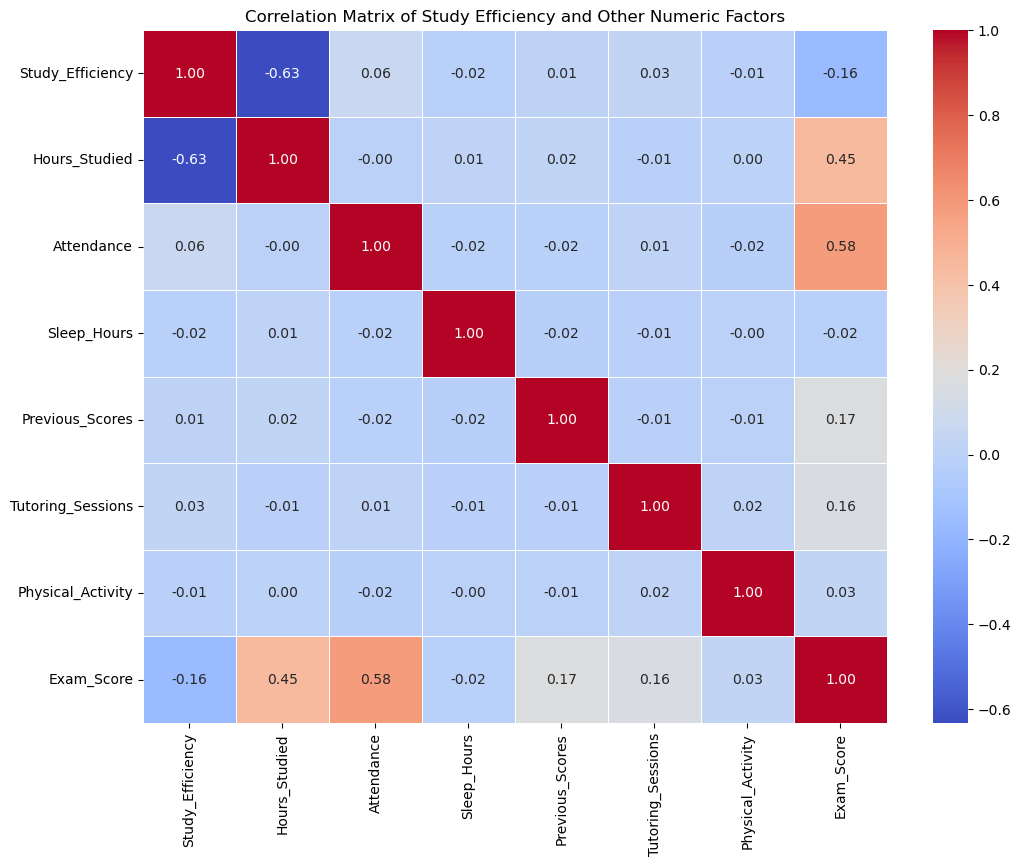

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Define the correct order for categorical variables for better visualization
income_order = ['Low', 'Medium', 'High']
education_order = ['High School', 'College', 'Postgraduate']

# Convert categorical columns to an ordered categorical type
df['Family_Income'] = pd.Categorical(df['Family_Income'], categories=income_order, ordered=True)
df['Parental_Education_Level'] = pd.Categorical(df['Parental_Education_Level'], categories=education_order, ordered=True)

# Chart 1: Heatmap of Average Exam Scores by Socioeconomic Factors
pivot_table = df.pivot_table(values='Exam_Score', index='Parental_Education_Level', columns='Family_Income', aggfunc='mean')

plt.figure(figsize=(10, 7))
# Create the heatmap with annotations and a blue color map
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
plt.title('Student Success: Average Exam Score by Family Income and Parental Education')
plt.xlabel('Family Income Level')
plt.ylabel('Parental Education Level')
plt.savefig('heatmap_scores_by_socioeconomic.png')
plt.show()

# Chart 2: Correlation Heatmap of Study Efficiency and Other Factors
numeric_cols = ['Study_Efficiency', 'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Study Efficiency and Other Numeric Factors')
plt.savefig('correlation_heatmap_efficiency.png')
plt.show()

**Graph 1 - Heat Map** 

This chart shows the relationship between family income, parental education level, and student exam scores. Overall, student performance increases as both family income and parental education level rise. Students from high-income families and with postgraduate-educated parents have the highest average exam scores (68.6), while those from low-income families with high school–educated parents score the lowest (66.5). The trend suggests that both higher parental education and higher family income contribute positively to student academic success.

**Graph 2 - Correlation Table**

This correlation matrix illustrates the relationships between all of the academic factors in the dataset. The strongest positive correlations with exam score are attendance (0.58) and hours studied (0.45), suggesting that students who attend class regularly and study more tend to score higher. Previous scores, tutoring sessions, and physical activity have weaker positive relationships with exam performance. Interestingly, study efficiency is negatively correlated with hours studied (-0.63) and exam score (-0.16), which may suggest that students who spend excessive time studying may not always do so effectively. Overall, attendance and consistent study time are the most significant factors in achieving better exam outcomes.